# Part I - Ford GoBike System Data
## by Yasmin Madjitey

## Introduction
> In this data exploration project, I decided to go with the Ford GoBike System because I find the bike-sharing system in general, interesting. It is an opportunity to look at the state of the system in general using the provided dataset as an example. I looked at what could influence the bike-sharing system using features like user type (customer or subscriber), gender, birth year, trip duration which is in seconds, and cordinates of the start and end stations.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import datetime
%matplotlib inline

In [2]:
# to programmatically download the dataset
url = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'
r = requests.get(url)
with open ('gobike.csv', mode = 'wb') as f:
    f.write(r.content)

In [3]:
#to load and view the data
go_bike = pd.read_csv('gobike.csv')
print(go_bike.shape)
go_bike.info()
go_bike.head(10)

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


> Looking at the dataset, a common issue seen is the data type of the features. To allow for a correct data exploration, the data has to be cleaned.

#### Data Cleaning

In [4]:
#define : change the dtypes to the appropriate form
## code :     
go_bike.start_time =   pd.to_datetime(go_bike.start_time)           
go_bike.end_time = pd.to_datetime(go_bike.end_time)                 
go_bike.start_station_id =  go_bike.start_station_id.astype(str)      
go_bike.start_station_name  = go_bike.start_station_name.astype(str)         
go_bike.end_station_id = go_bike.end_station_id.astype(str)         
go_bike.end_station_name = go_bike.end_station_name.astype(str)               
go_bike.bike_id = go_bike.bike_id.astype(str)                
go_bike.member_gender =  go_bike.member_gender.astype('category')     
go_bike.bike_share_for_all_trip =  go_bike.bike_share_for_all_trip.astype('category')  
go_bike.member_birth_year =  go_bike.member_birth_year.astype(str)

In [5]:
#to remove the '.0' at the end
go_bike.start_station_id = [s.rstrip(".0") for s in go_bike.start_station_id.values]
go_bike.end_station_id = [s.rstrip(".0") for s in go_bike.end_station_id.values]
go_bike.member_birth_year = [s.rstrip(".0") for s in go_bike.member_birth_year.values]

In [7]:
#to extract the start and end hours as well as days and save the values into new columns
go_bike['start_day'] = go_bike.start_time.dt.weekday_name
go_bike['end_day'] = go_bike.end_time.dt.weekday_name
go_bike['start_hour'] = go_bike['start_time'].dt.hour
go_bike['end_hour'] = go_bike['end_time'].dt.hour

go_bike['end_hour'] = go_bike['end_hour'].astype(str)
go_bike['start_hour'] = go_bike['start_hour'].astype(str)

Part of my exploration is to look at the distance covered by trips. Given the latitude and Longitude, I can calculate the distance in kilometres using the geopy library. Run ***pip install geopy*** in the workspace terminal to install the librabry. I used this library to get the distance between the coordinates.

In [8]:
#adding distance to my dataset
import geopy
from geopy import distance
go_bike['trip_km'] = go_bike[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 
                        'end_station_longitude']].apply(lambda x: distance.distance((x[0],x[1]), (x[2],x[3])).km, axis=1)

https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [9]:
#test
go_bike.info()
go_bike

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183412 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183412 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null object
member_birth_year          183412 non-null object
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
start_day                  183412 non-null object
end_day         

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,start_hour,end_hour,trip_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,Thursday,Friday,17,8,0.543983
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,...,2535,Customer,nan,NaN,No,Thursday,Friday,18,6,1.739909
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,Thursday,Friday,12,5,2.705390
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,7,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,Thursday,Friday,17,4,0.260896
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,Thursday,Friday,23,0,2.412017
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,Thursday,Friday,23,0,3.328256
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,3,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983,Female,No,Thursday,Friday,23,0,2.029323
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,1,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989,Male,No,Thursday,Friday,23,0,4.526203
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,1,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988,Other,No,Thursday,Friday,23,0,4.526203
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,...,6488,Subscriber,1992,Male,No,Thursday,Friday,23,0,3.660261


In [10]:
go_bike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
go_bike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
go_bike.start_day.unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [13]:
go_bike.member_birth_year.unique()

array(['1984', 'nan', '1972', '1989', '1974', '1959', '1983', '1988',
       '1992', '1996', '1993', '199', '1981', '1975', '1978', '1991',
       '1997', '1986', '2', '1982', '1995', '198', '1973', '1985', '1971',
       '1979', '1967', '1998', '1994', '1977', '1999', '1987', '1969',
       '1963', '1976', '1964', '1965', '1961', '1968', '1966', '1962',
       '1954', '1958', '196', '197', '1956', '1957', '1945', '19', '1952',
       '1948', '1951', '1941', '195', '1949', '1953', '1955', '1946',
       '1947', '1931', '1943', '1942', '192', '1933', '2001', '1878',
       '1901', '1944', '1928', '1934', '1939', '193', '1902', '191',
       '1938', '1927'], dtype=object)

In [14]:
#to replace the 'nan' value with np.nan in birth year column
go_bike.member_birth_year = go_bike.member_birth_year.replace('nan', np.nan)
#since I would like to know what age groups patronise the service, I would replace invalid birth years with np.nan
invalid_years = ['199', '2', '198', '196', '197',  '19', '195', '192', '193', '191']
for r in invalid_years:
    go_bike.member_birth_year = go_bike.member_birth_year.replace(r, np.nan)

In [15]:
go_bike.member_birth_year.unique()

array(['1984', nan, '1972', '1989', '1974', '1959', '1983', '1988', '1992',
       '1996', '1993', '1981', '1975', '1978', '1991', '1997', '1986',
       '1982', '1995', '1973', '1985', '1971', '1979', '1967', '1998',
       '1994', '1977', '1999', '1987', '1969', '1963', '1976', '1964',
       '1965', '1961', '1968', '1966', '1962', '1954', '1958', '1956',
       '1957', '1945', '1952', '1948', '1951', '1941', '1949', '1953',
       '1955', '1946', '1947', '1931', '1943', '1942', '1933', '2001',
       '1878', '1901', '1944', '1928', '1934', '1939', '1902', '1938',
       '1927'], dtype=object)

In [16]:
go_bike.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [17]:
#the most route used 
some_col = go_bike.start_station_name +  ' --> ' + go_bike.end_station_name
some_col.value_counts().head(20)

Berry St at 4th St --> San Francisco Ferry Building (Harry Bridges Plaza)                   337
San Francisco Ferry Building (Harry Bridges Plaza) --> The Embarcadero at Sansome St        314
Grand Ave at Perkins St --> 19th Street BART Station                                        310
The Embarcadero at Sansome St --> Steuart St at Market St                                   285
19th Street BART Station --> Grand Ave at Perkins St                                        284
Market St at 10th St --> Montgomery St BART Station (Market St at 2nd St)                   272
Townsend St at 7th St --> San Francisco Caltrain Station 2  (Townsend St at 4th St)         272
San Fernando St at 7th St --> 5th St at Virginia St                                         249
Market St at 10th St --> Powell St BART Station (Market St at 4th St)                       247
5th St at Virginia St --> San Fernando St at 7th St                                         242
Market St at 10th St --> San Francisco C

### What is the structure of your dataset?

> There are 183,412 entries in the dataset with 16 original columns/attributes in relation to individual rides made in the bike-sharing system. However, for better understanding, I extracted the days and hours in which the service was started and ended into new columns. I also created a new column with distance values in kilometers calculated based on the latitude and longitude columns provided. Some of the other features include the duration of the ride in seconds, user type (customers, subscribers), members birth year as well as gender. The dataset covers entries for the month of February. The final dataset consists of more object variables than numeric ones.

### What is/are the main feature(s) of interest in your dataset?

> I would like to know whether the user type (customer or subscriber) has an effect on the modality of the service. Does the duration or distance of a trip depend on if a user is a subscriber or customer? When are most trips taken in terms of time of day or day of the week? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that user type, duration, distance, and start time and day will support my investigation.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables. 


***I will start by looking at the distribution of the user types***

In [18]:
#first change ordinal objects to the appropriate form
var_dict = {'user_type': ['Customer', 'Subscriber'],
            'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            'end_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
             'bike_share_for_all_trip': ['No', 'Yes'],
             'start_hour': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                            '18', '19', '20', '21', '22', '23'],
             'end_hour': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                            '18', '19', '20', '21', '22', '23']}
for v in var_dict:
    ordered_v = pd.api.types.CategoricalDtype(ordered = True, categories= var_dict[v])
    go_bike[v] = go_bike[v].astype(ordered_v)

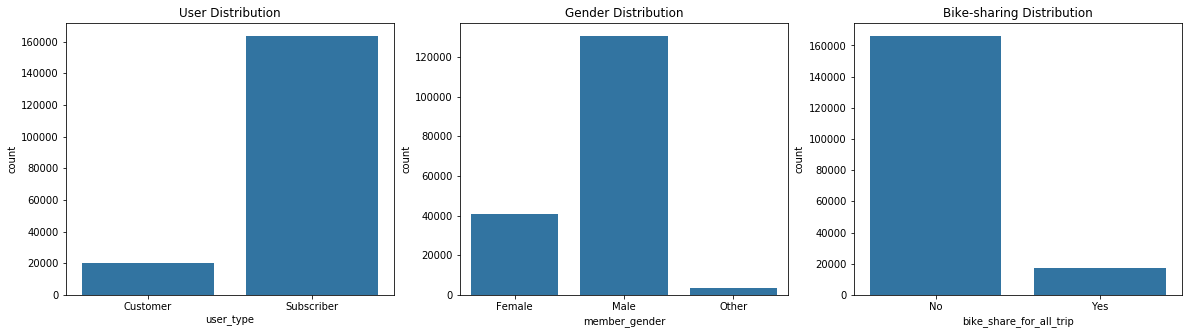

In [19]:
#used countplot for categorical data type
#plotting graphs side by side
color = sb.color_palette()[0]
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
sb.countplot(data = go_bike, x = 'user_type', color = color);
plt.title('User Distribution');

plt.subplot(1, 3, 2)
sb.countplot(data = go_bike, x = 'member_gender', color = color);
plt.title('Gender Distribution');

plt.subplot(1, 3, 3)
sb.countplot(data = go_bike, x = 'bike_share_for_all_trip', color = color);
plt.title('Bike-sharing Distribution');

> The plots show the bike-sharing system has more subscribers than customers and more male than female patronise the service. Most trips do not engage in bike share.

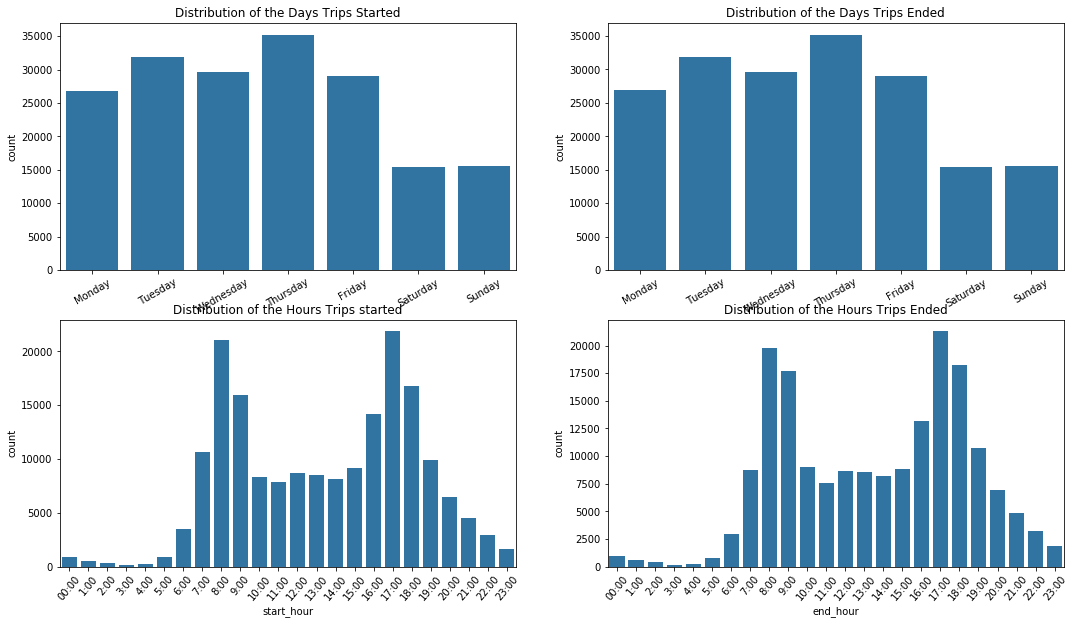

In [20]:
#to plot the three figures side by side
plt.figure(figsize = [18, 10])
color = sb.color_palette()[0]
plt.subplot(2, 2, 1)
sb.countplot(go_bike.start_day, color = color);
plt.xticks(rotation = 30)
plt.title('Distribution of the Days Trips Started');

plt.subplot(2, 2, 2)
sb.countplot(go_bike.end_day, color = color);
plt.xticks(rotation = 30)
plt.title('Distribution of the Days Trips Ended');

plt.subplot(2, 2, 3)
sb.countplot(go_bike.start_hour, color = color)
#setting customized ticklabels for x axis
labs = ['00:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00',
       '12:00', '13:00', '14:00', '15:00', '16:00', '17:00','18:00', '19:00', '20:00', '21:00', '22:00', '23:00'] 
plt.xticks(range(24), labs, rotation = 50)
plt.title('Distribution of the Hours Trips started');

plt.subplot(2, 2, 4)
sb.countplot(go_bike.end_hour, color = color)
#setting customized ticklabels for x axis
labs = ['00:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00',
       '12:00', '13:00', '14:00', '15:00', '16:00', '17:00','18:00', '19:00', '20:00', '21:00', '22:00', '23:00'] 
plt.xticks(range(24), labs, rotation = 50)
plt.title('Distribution of the Hours Trips Ended');

> The distribution above shows that trips occured within a 24 hour time frame. Both diagrams for start and end days look the same with the most trips ocurring on Thursdays. Also, most trips start from 17:00 and most trips end around the same hour.

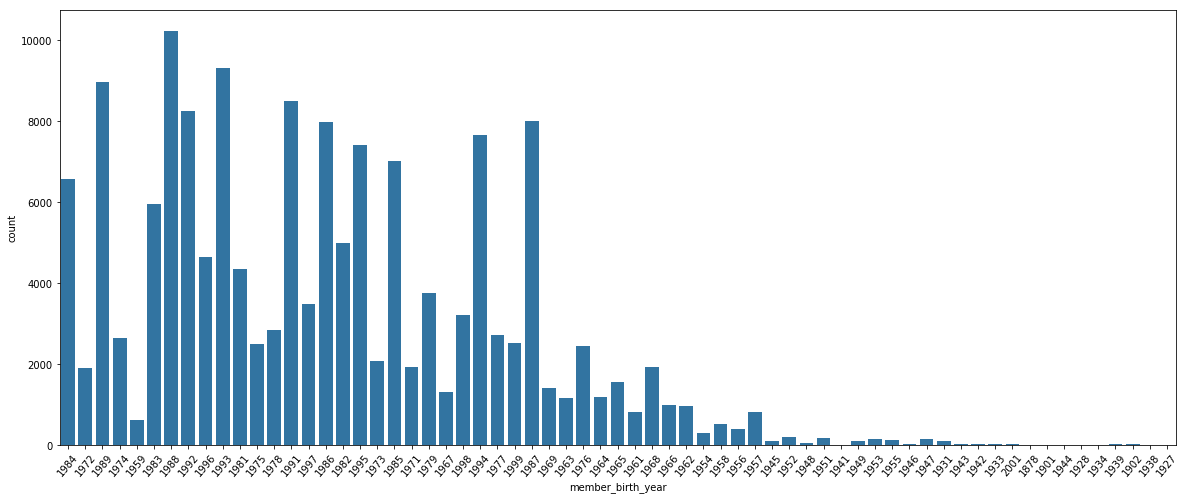

In [21]:
#distribution of birth year or year group
plt.figure(figsize = [20, 8])
sb.countplot(data = go_bike, x ='member_birth_year', color = color)
plt.xticks(rotation = 50);

In [22]:
go_bike.trip_km.describe()

count    183412.000000
mean          1.690555
std           1.097158
min           0.000000
25%           0.909777
50%           1.429907
75%           2.226169
max          69.465977
Name: trip_km, dtype: float64

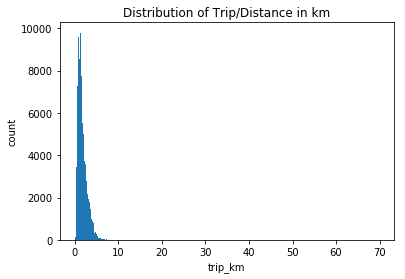

In [23]:
#to visualize the distribution of trip distance covered
bins = np.arange(0, 70, 0.1)
plt.hist(data = go_bike, x = 'trip_km', bins = bins)
plt.xlabel('trip_km')
plt.title('Distribution of Trip/Distance in km')
plt.ylabel('count');

From the diagram above, it would be much better to transform the distance values. I used cuberoot

In [24]:
def cuberoot_trans(x, inverse = False):
    """ function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

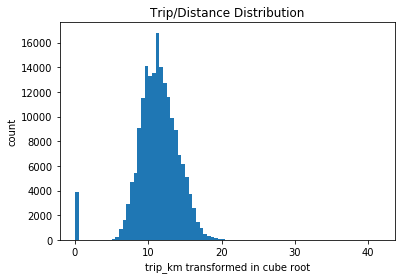

In [25]:
#to plot against a transformed x variable(trip_km)
go_bike['distance_km'] = go_bike['trip_km'].apply(cuberoot_trans)
bins = np.arange(0, 4.11 + 0.05, 0.05)
plt.hist(data = go_bike, x = 'distance_km', bins = bins)
plt.xlabel('trip_km transformed in cube root')
plt.title('Trip/Distance Distribution')
plt.ylabel('count')
labels = ['0', '10','20', '30', '40']
plt.xticks(np.arange(0, 4+1, 1), labels);

In [26]:
go_bike['distance_km'].describe()

count    183412.000000
mean          1.127994
std           0.286530
min           0.000000
25%           0.968973
50%           1.126599
75%           1.305728
max           4.110778
Name: distance_km, dtype: float64

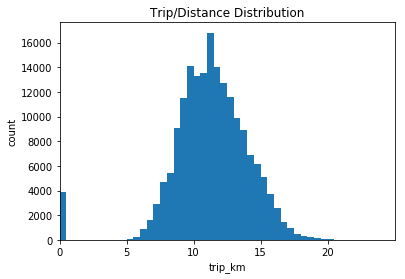

In [27]:
#add xlim to focus the plot from 0 to 2.5
bins = np.arange(0, 4.11 + 0.05, 0.05)
plt.hist(data = go_bike, x = 'distance_km', bins = bins)
plt.xlim(0, 2.5)
plt.xlabel('trip_km')
plt.title('Trip/Distance Distribution')
plt.ylabel('count')
labels = ['0', '5','10', '15', '20', '25']
plt.xticks(np.arange(0, 2.5, 0.5), labels);

We can clearly see that the graph is unimodal with the average trip around 13 km. We also see 0 km for trip values which is strange.

In [28]:
n = go_bike[go_bike['trip_km'] == 0]
n

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,start_hour,end_hour,trip_km,distance_km
19,874,2019-02-28 23:43:05.183,2019-02-28 23:57:39.796,18,Telegraph Ave at 23rd St,37.812678,-122.268773,18,Telegraph Ave at 23rd St,37.812678,...,Customer,1978,Male,No,Thursday,Thursday,23,23,0.0,0.0
27,408,2019-02-28 23:48:08.282,2019-02-28 23:54:56.930,78,Folsom St at 9th St,37.773717,-122.411647,78,Folsom St at 9th St,37.773717,...,Subscriber,1982,Male,No,Thursday,Thursday,23,23,0.0,0.0
34,471,2019-02-28 23:42:43.361,2019-02-28 23:50:34.446,133,Valencia St at 22nd St,37.755213,-122.420975,133,Valencia St at 22nd St,37.755213,...,Subscriber,1992,Male,No,Thursday,Thursday,23,23,0.0,0.0
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,...,Customer,NaN,NaN,No,Thursday,Thursday,22,23,0.0,0.0
55,3478,2019-02-28 22:39:35.020,2019-02-28 23:37:33.342,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,...,Subscriber,1995,Male,No,Thursday,Thursday,22,23,0.0,0.0
56,3140,2019-02-28 22:44:53.503,2019-02-28 23:37:14.090,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,...,Subscriber,1983,Female,No,Thursday,Thursday,22,23,0.0,0.0
59,422,2019-02-28 23:28:50.464,2019-02-28 23:35:52.552,24,Haste St at Telegraph Ave,37.866043,-122.258804,24,Haste St at Telegraph Ave,37.866043,...,Subscriber,1997,Male,Yes,Thursday,Thursday,23,23,0.0,0.0
60,401,2019-02-28 23:28:53.508,2019-02-28 23:35:34.926,24,Haste St at Telegraph Ave,37.866043,-122.258804,24,Haste St at Telegraph Ave,37.866043,...,Subscriber,1997,Female,Yes,Thursday,Thursday,23,23,0.0,0.0
72,113,2019-02-28 23:26:28.335,2019-02-28 23:28:21.625,163,Lake Merritt BART Station,37.797320,-122.265320,163,Lake Merritt BART Station,37.797320,...,Subscriber,1975,Male,No,Thursday,Thursday,23,23,0.0,0.0
74,371,2019-02-28 23:21:37.878,2019-02-28 23:27:48.979,369,Hyde St at Post St,37.787349,-122.416651,369,Hyde St at Post St,37.787349,...,Subscriber,NaN,Male,No,Thursday,Thursday,23,23,0.0,0.0


The distance distribution shows about 4000 trips of 0km which is surprising because the corresponding trip duration, has time values. This looks like a calculation error.

In [35]:
#plotting a distribution of trip duration
go_bike['duration_hour'] = [s/3600 for s in go_bike.duration_sec]
go_bike['duration_hour'] = go_bike['duration_hour'].apply(cuberoot_trans)
go_bike['duration_hour'].describe()

count    183412.000000
mean          0.539132
std           0.146214
min           0.256848
25%           0.448601
50%           0.522661
75%           0.604696
max           2.873821
Name: duration_hour, dtype: float64

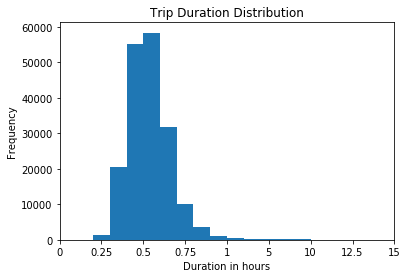

In [52]:
bins = np.arange(0, 2.9 + 0.1, 0.1)
plt.hist(go_bike.duration_hour, bins = bins);
plt.xlim(0, 2)
plt.xlabel('Duration in hours')
plt.title('Trip Duration Distribution')
plt.ylabel('Frequency')
labels = ['0', '0.25', '0.5', '0.75', '1', '5', '10', '12.5', '15', '20']
plt.xticks(np.arange(0, 2.1, 0.25), labels);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The univariate exploration was carried out to look at how individual variables are distributed. I expected that user type, duration, distance, and start time will support my investigation. So I went ahead to look at each variable on its own. Given that the variables under scrutiny are of ordered category, ie. user type, and the extracted days of the week, I ordered them accordingly and then used sb.countplot() function to visualize the distribution.

> The distribution showed that trips occured within a 24 hour time frame. The start and end day plots looked the same and unimodal, depicting that the most trips ocurred on Thursday. The time of the day plot or hour plot is almost bimodal, with most trips starting at 8:00 and 17:00. This is not so surprising as 8:00 - 17:00 fall within the time most jobs start and end. Plotted on a cube root scale, the distribution of distance takes on a unimodal shape at about 13km. There are also more subscribers than customers in the dataset.

> There are more male than female in the dataset and most of the members are 1988 borns.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to convert the user type column so it is ordered from customer to a suscriber because it is of ordinal category. The distance distribution showed about 4000 trips of 0km which was surprising because the corresponding trip duration, had time values. This looks like a calculation error.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of the variables explored in the univariate exploration phase.

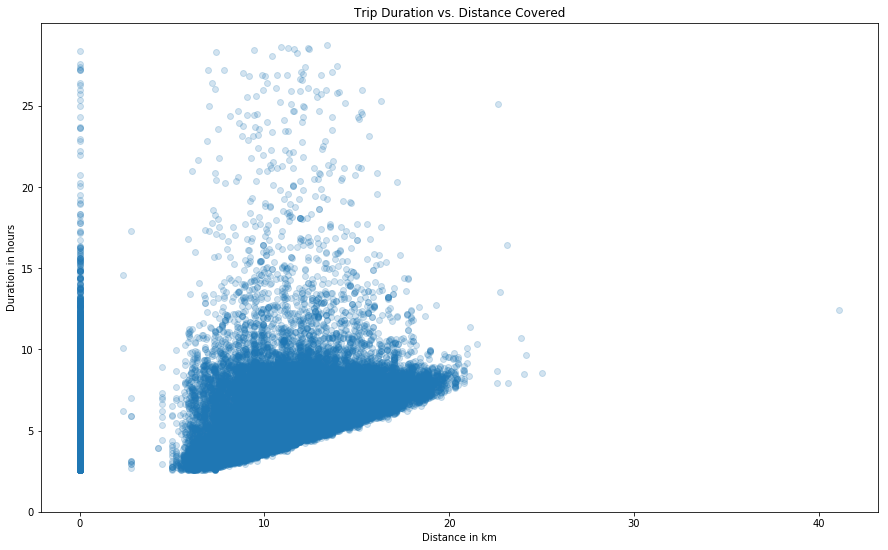

In [54]:
#to visualize the relationship between duration and distance
plt.subplots(figsize = (15, 9))

plt.scatter(go_bike['distance_km'], go_bike['duration_hour'], alpha = 1/5)

plt.title('Trip Duration vs. Distance Covered')
plt.ylabel("Duration in hours")
plt.xlabel('Distance in km');

labs = ['0', '10','20', '30', '40']
plt.xticks(np.arange(0, 4+1, 1), labs)

labels = ['0','5', '10', '15', '20', '25', '30']
plt.yticks(np.arange(0, 3, 0.5), labels);

In [71]:
go_bike['distance_km'].corr(go_bike['duration_hour'])

0.38997480981214189

A strong relationship was expected here, since it made sense that, the longer the distance, the more time would be spent. However, that is not what I got from the plot above. Time spent did not really depend on the distance. 

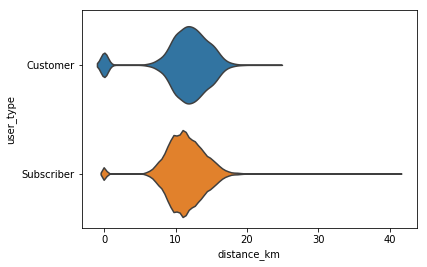

In [55]:
#plotting user type against distance
sb.violinplot(data = go_bike, x = 'distance_km', y = 'user_type', inner = None)
labels = ['0', '10','20', '30', '40']
plt.xticks(np.arange(0, 4+1, 1), labels);

one can see that as members move from customers to subscribers, the distance covered increases, although there are much fewer subscribers along the lines of long trips. The bulk of customers and subscribers can be seen between trips of 8km and 18 km long.

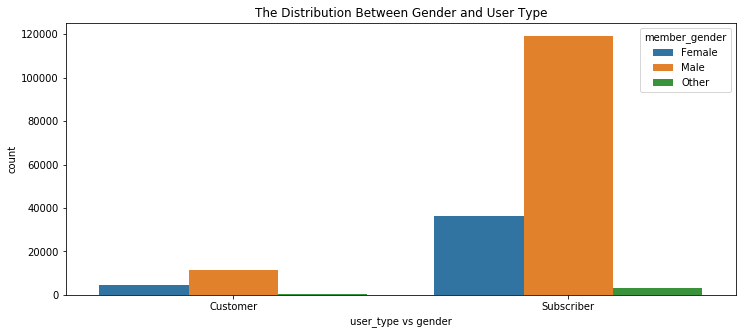

In [57]:
plt.figure(figsize = [12,5])
sb.countplot(data = go_bike, x = 'user_type', hue = 'member_gender')
plt.title('The Distribution Between Gender and User Type')
plt.xlabel('user_type vs gender');

> As anticipated, the diagram shows more male subscribers than women and even, more male customers than women, however, with a much smaller difference compared to subscriptions.

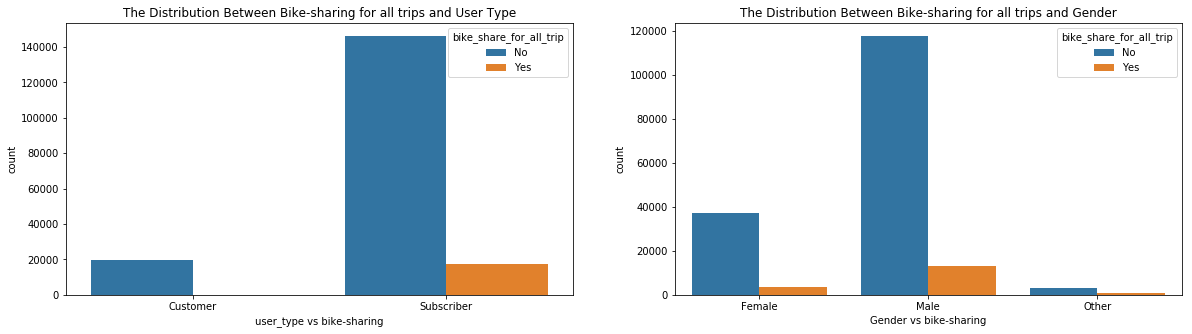

In [58]:
#to plot graphs side by side
plt.figure(figsize = [20,5])
plt.subplot(1, 2, 1)
sb.countplot(data = go_bike, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.title('The Distribution Between Bike-sharing for all trips and User Type')
plt.xlabel('user_type vs bike-sharing');

plt.subplot(1, 2, 2)
sb.countplot(data = go_bike, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.title('The Distribution Between Bike-sharing for all trips and Gender')
plt.xlabel('Gender vs bike-sharing');

only a few subscribers engage in bike share for all trips and none for customers

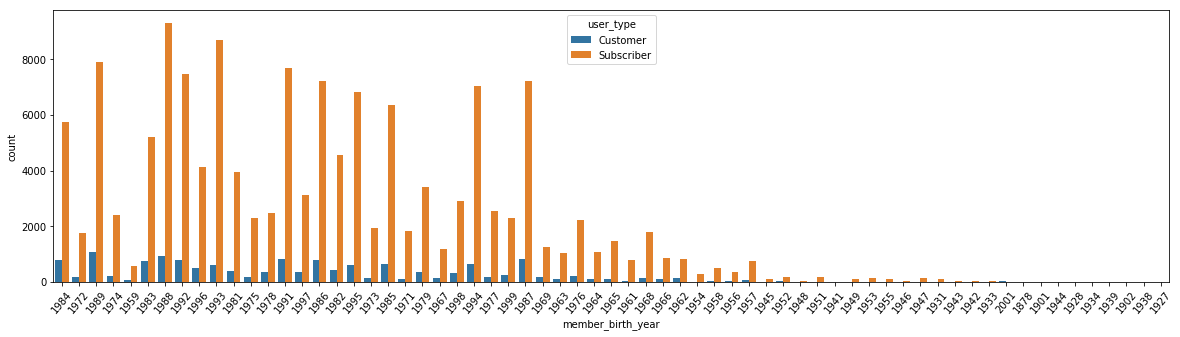

In [59]:
plt.figure(figsize = [20, 5])
sb.countplot(data = go_bike, x ='member_birth_year', hue='user_type')
plt.xticks(rotation = 50);

> From the plots above, we can conclude that, there is little or no bike-sharing for trips undertaken by customers with a little bike-sharing by subscribers. Again, more men than females engage in bike-sharing.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  In this section, I investigated the relationships between pairs of the above mentioned variables in the data. Visualizing the relationship between the user type and distance covered, one can see that as members move from customers to subscribers, the distance covered increases, although there are much fewer subscribers along the lines of long trips. The bulk of customers and subscribers can be seen between trips of 8km and 20 km long.

> One would expect the distance covered by a trip to be in tune with the duration. A strong relationship was expected here, since it made sense that, the longer the distance, the more time would be spent. However, that is not what I got from the plot. Time spent did not really depend on the distance. The bulk of the data sat around 0-10 hours and 0-20 km. It can also be seen that, an increase in the trip duration does not neccessarily corespond with an increase in distance covered. This could be as a result of stops or pauses taken by the individual.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A strong relationship was expected between distance and duration, since it made sense that, the longer the distance, the more time would be spent. However, that is not what I got from the plot above. Time spent did not really depend on the distance.

## Multivariate Exploration

> Here, I created plots of three or more variables to investigate the data even
further.

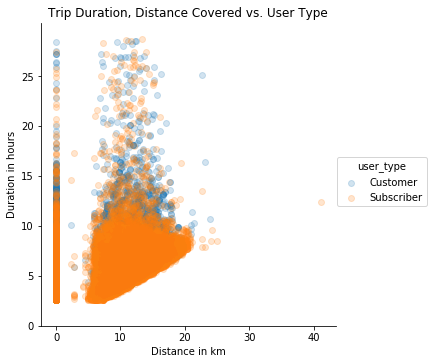

In [66]:
#to plot user type, distance and duration
g = sb.FacetGrid(data = go_bike, hue = 'user_type', size = 5)
g.map(plt.scatter, 'distance_km', 'duration_hour', alpha = 1/5)
plt.title('Trip Duration, Distance Covered vs. User Type')
plt.ylabel("Duration in hours")
plt.xlabel('Distance in km');

labs = ['0', '10','20', '30', '40']
plt.xticks(np.arange(0, 4+1, 1), labs)

labels = ['0','5', '10', '15', '20', '25', '30']
plt.yticks(np.arange(0, 3, 0.5), labels)
g.add_legend();

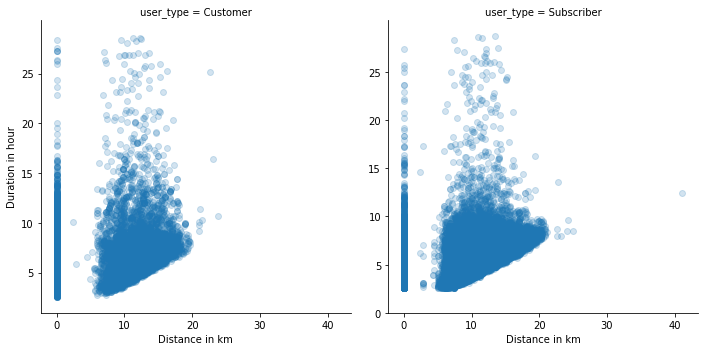

In [69]:
# to create a faceted plot on levels of the user_type variable
g = sb.FacetGrid(data = go_bike, col = 'user_type', size = 5)
g.map(plt.scatter, 'distance_km', 'duration_hour', alpha = 1/5)
g.set_xlabels('Distance in km')
g.set_ylabels('Duration in hour')
labels = ['0','5', '10', '15', '20', '25', '30']
plt.yticks(np.arange(0, 3, 0.5), labels)
labs = ['0', '10','20', '30', '40']
plt.xticks(np.arange(0, 4+1, 1), labs);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In a plot looking at the relationship between user types, distance covered and duration, points for customers tend be smaller than for subscribers.Plotting this relationship on each level of user type, ie. customer and subscriber, there doesn't seem to a difference in their relationship between distance and duration. Which is to say that, distance covered or the trip's duration doesn't really depend on the type of user, be it a customer or a subscriber.

### Were there any interesting or surprising interactions between features?

> This further affirms the observation in the bivariate exploration phase concerning a weak relationship between distance and duration.

## Conclusions
> To summarize my findings, I would like to hint at the fact that most trips started at 8:00 and 17:00 which is not so surprising as 8:00 - 17:00 fall within the time most jobs start and end. However, Thursday was the day of the week most trips are taken. Surprisingly, duration and distance covered does not depend on the user type eventhough there are more subscribers than customers in the dataset. Other external factors like promotional activities by the company will explain why there are more subscribers than customers.

> I also saw that more male than female use the service and people within the age group of 34 use the service most. This may help the company decide on where to focus its advertisements.

> Should there be data on the traffic system of the area under study, it could also help in understanding what influences people to engage in the bike-sharing system.
